<h1 style="text-align:center;">Cinétique chimique </h1>

#### À partir de données expérimentales, tracer l’évolution temporelle d’une concentration, d’une vitesse volumique d’apparition ou de disparition et tester une relation donnée entre la vitesse volumique de disparition et la concentration d’un réactif (terminale)

In [2]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

On a fait le choix ici d'un affichage dynamique des courbes, sur lesquelles il est possible de se déplacer, de pointer une valeur ou encore de zoomer (attention cette ligne ne fonctionne que sur un notebook jupyter et est à supprimer pour un IDE python classique)

In [3]:
%matplotlib notebook

Nous travaillerons ici sur des données expérimentales obtenues à l'aide d'un spectrophotomètre sur la réaction d'oxydation de $I^{-}$ par $H_2O_2$ en milieu acide relevées à la main. Le suivi temporel étant réalisé à l'aide d'un chronomètre. Les données peuvent bien entendu être plus qualitatives si le suivi est fait de manière automatique donnant ainsi un nombre de points bien plus important.

La courbe expérimentale d'absorbance en fonction du temps peut s'afficher facilement en utilisant la bibliothèque matplotlib.

<IPython.core.display.Javascript object>


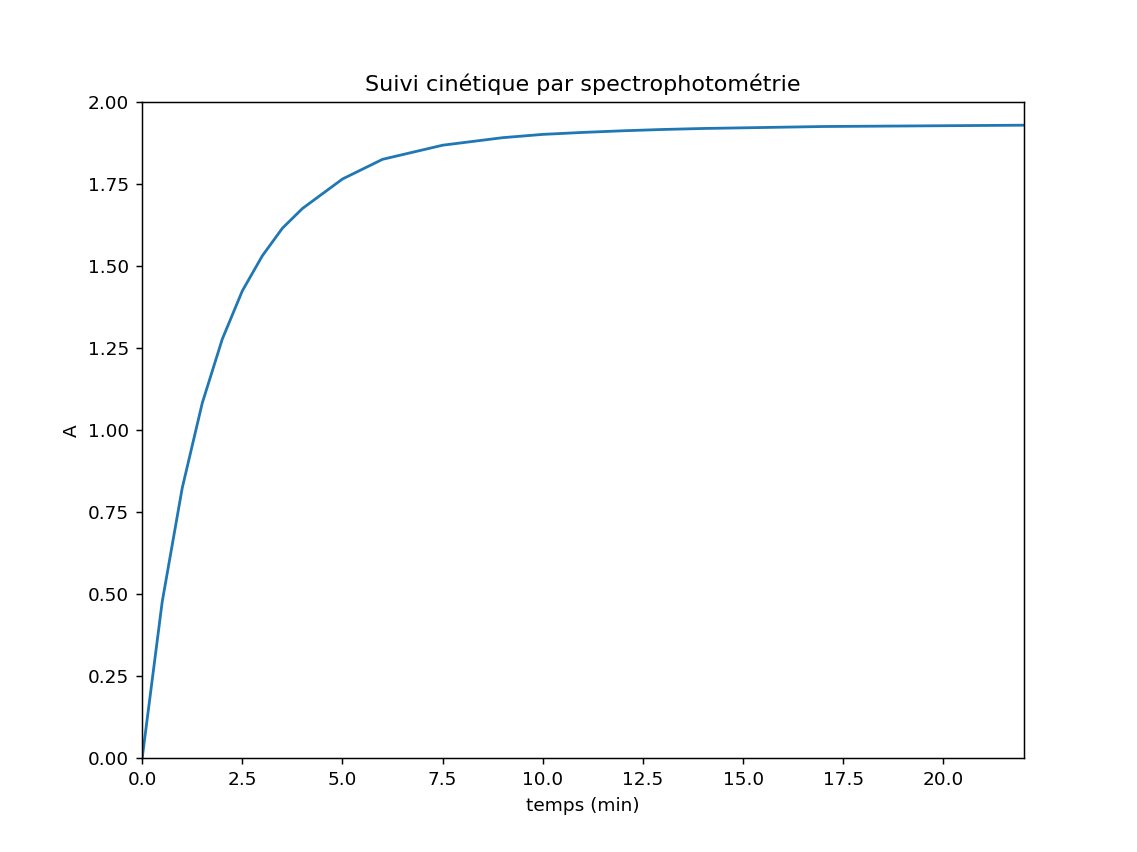

In [4]:
t = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 5, 6, 7.5,
     9, 10, 11, 12, 13, 14, 15, 17, 22] # temps (en minutes)
A = [0, 0.477, 0.824, 1.083, 1.278, 1.425, 1.532, 1.616, 1.676, 1.766, 1.826, 1.869,
     1.892, 1.902, 1.908, 1.913, 1.917 ,1.92, 1.922, 1.926, 1.93] # Absorbances
fig = plt.figure("Suivi cinétique par spectrophotométrie")
plt.plot(t,A)
plt.xlabel("temps (min)")
plt.ylabel("A")
plt.xlim([0,22])
plt.ylim([0,2])
plt.title("Suivi cinétique par spectrophotométrie")
plt.show()

Le tableau d'avancement associé à la réaction est donné ci-dessous. Le mélange réactionnel est obtenu en mélangeant 5 mL d'une solution de KI à 0.2 $mol\cdot L^{-1}$, 20 mL d'une solution d'acide sulfurique à 1 mol/L et 5 mL d'une solution de $H_2O_2$ à $5 \cdot 10^{-3}\ mol.L^{-1}$. La réaction étant totale, on a ici $[I_2]_f = 8,33 \cdot 10^{-4}\ mol.L^{-1}$.
$$ \ $$

|     | $2 I^{-}$ |  +  | $2 H^{+}$ | + | $H_2O_2$ | $\rightleftarrows$ | $I_2$ |  +  | $2 H_2O$ |
|:---:|:-----:|:---:|:----------------:|:---:|:-----:|:---:|:-------:|:---:|:------------:|
| EInit | $C_1 V_1$ |  |  $excès$ |  | $C_2 V_2$ | |  $0$  |   |  $solvant$  |
| EInter | $C_1 V_1 - 2x$ |  |  $excès$ |  | $C_2 V_2 - x $ |  |  $x$ |   | $solvant$ |
| EF | $C_1  V_1 - 2x_f$  |  |  $excès$ |  | $C_2 V_2 - x_f = 0$ |  | $x_f$ |  |  $solvant$ |

$$ \ $$

A t = 22 min on a $A = \epsilon l [I_2] = 1.93$ d'où $\epsilon l = k = 2316 L.mol^{-1}$ On peut donc remonter à la concentration en diiode en fonction du temps et convertir le temps en seconde.

<IPython.core.display.Javascript object>


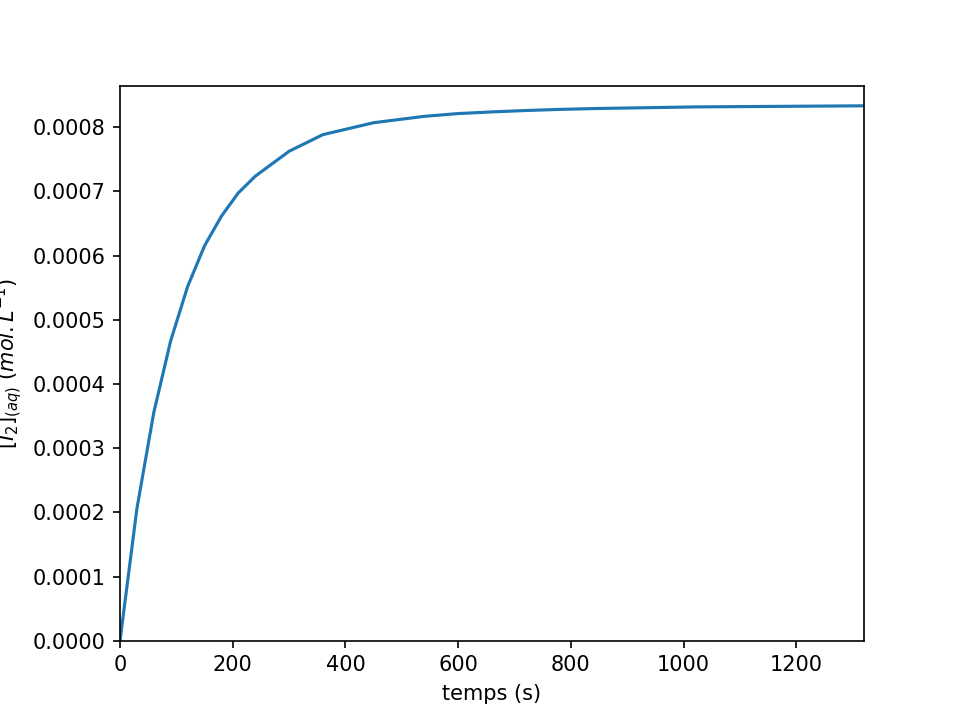

In [5]:
t = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 5, 6, 7.5, 9, 10, 11, 12, 13, 14, 15, 17, 22] # en minutes
A = [0, 0.477, 0.824, 1.083, 1.278, 1.425, 1.532, 1.616, 1.676, 1.766, 1.826, 1.869, 1.892, 1.902, 1.908, 1.913, 1.917 , 
     1.92, 1.922, 1.926, 1.93] # Absorbance
k = 2316.

t_s = []
for val in t:
    t_s.append(val*60)

C = []
for val in A:
    C.append(val/k)

fig = plt.figure("Suivi cinétique par spectrophotométrie2")
plt.plot(t_s,C)
plt.xlabel("temps (s)")
plt.ylabel(r"$[I_2]_{(aq)}\ (mol.L^{-1})$")
plt.xlim([0,22*60])
plt.ylim([0,2./2316.])
plt.show()

Afin d'accéder à la vitesse volumique d'apparition de $I_2$, il faut dériver la concentration de $I_2$ par rapport au temps. On utilise ici un calcul approché en utilisant le taux d'accroissement avec le pas de temps le plus petit possible.
$$v(t) = \lim_{dt \rightarrow 0}{\frac{[I_2]_{t+dt} - [I_2]_{t}}{dt}} \approx v[i] = \frac{C[i+1] - C[i]}{t\_s[i+1]-t\_s[i]}$$

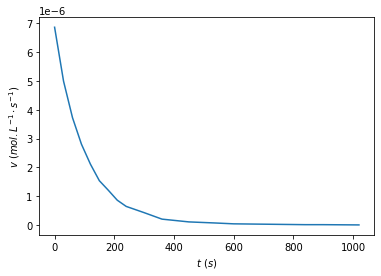

In [4]:
t = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 5, 6, 7.5, 9, 10, 11, 12, 13, 14, 15, 17, 22] # en minutes
A = [0, 0.477, 0.824, 1.083, 1.278, 1.425, 1.532, 1.616, 1.676, 1.766, 1.826, 1.869, 1.892, 1.902, 1.908, 1.913, 1.917 , 
     1.92, 1.922, 1.926, 1.93] # Absorbance
k = 2316.

t_s = []
for val in t:
    t_s.append(val*60)

C = []
for val in A:
    C.append(val/k)

fig = plt.figure("Vitesse volumique d'apparition du diiode")

v = []
for i in range(len(A)-1):
    v.append((C[i+1]-C[i])/(t_s[i+1]-t_s[i])) # vitesse comme dérivée -taux d'acroissement-
    
plt.plot(t_s[:-1],v) # Il y a n instants mais seulement n-1 intervalles sur lesquels on calcule v. On élimine donc une valeur de t.
plt.xlabel(r"$t\ (s)$")
plt.ylabel(r"$v\ (mol.L^{-1}\cdot s^{-1})$")
plt.show()

Ici, $I^{-}$ est en excès et sa concentration peut être considérée comme constante au cours du temps. De même, la concentration en ion $H_3O^{+}$ peut être considérée comme constante. On peut donc se limiter à tester des lois de vitesse ne tenant compte que de la concentration en $H_2O_2$. 
$$ \ $$

Supposons que la loi de vitesse est $v = k_2 [H_2O_2]^{2}$. La courbe représentative de la vitesse en fonction de la concentration en $H_2O_2$ au carré devrait donc être une droite. Vérifions-le:

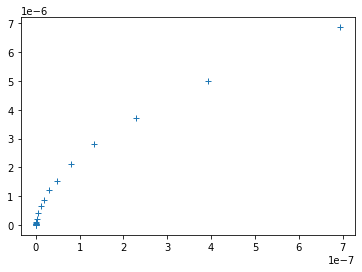

In [5]:
t = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 5, 6, 7.5, 9, 10, 11, 12, 13, 14, 15, 17, 22] # en minutes
A = [0, 0.477, 0.824, 1.083, 1.278, 1.425, 1.532, 1.616, 1.676, 1.766, 1.826, 1.869, 1.892, 1.902, 1.908, 1.913, 1.917 , 
     1.92, 1.922, 1.926, 1.93] # Absorbance
k = 2316.

t_s = []
for val in t:
    t_s.append(val*60)

C = []
for val in A:
    C.append(val/k)

H2O2_i = (5e-3*5e-3)/(30e-3)
H2O2 = []
for val in C:
    H2O2.append(H2O2_i - val)
    
x = []
for el in H2O2:
    x.append(el**2)

fig = plt.figure("Test d'une loi de vitesse1")
plt.plot(x[:-1],v,"+")
plt.show()

Il est bien évident que cette loi de vitesse ne convient pas par rapport aux données expérimentales.


Supposons maintenant que la loi de vitesse est $v = k_1 [H_2O_2]$. La courbe représentative de la vitesse en fonction de la concentration en $H_2O_2$ devrait donc être une droite. Vérifions-le:

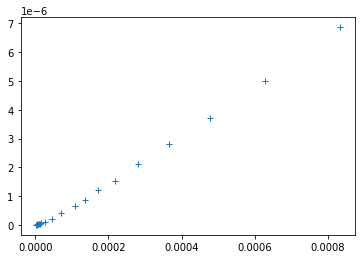

In [6]:
t = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 5, 6, 7.5, 9, 10, 11, 12, 13, 14, 15, 17, 22] # en minutes
A = [0, 0.477, 0.824, 1.083, 1.278, 1.425, 1.532, 1.616, 1.676, 1.766, 1.826, 1.869, 1.892, 1.902, 1.908, 1.913, 1.917 , 
     1.92, 1.922, 1.926, 1.93] # Absorbance
k = 2316.

t_s = []
for val in t:
    t_s.append(val*60)

C = []
for val in A:
    C.append(val/k)

H2O2_i = (5e-3*5e-3)/(30e-3)
H2O2 = []
for val in C:
    H2O2.append(H2O2_i - val)
    
x = []
for el in H2O2:
    x.append(el)

fig = plt.figure("Test d'une loi de vitesse1")
plt.plot(x[:-1],v,"+")
plt.show()

# Activité à réaliser

Une loi de vitesse en $v = k_0 [H_2O_2]^{0}$ ne paraît pas adaptée aux mesures expérimentales comme la loi en $v = k_2 [H_2O_2]^{2}$. Une loi de vitesse en $v = k_1 [H_2O_2]$ semble la plus adaptée.

1. Modéliser la courbe obtenue par une fonction linéaire. Quelle est la valeur de $k_1$ obtenue ici ?

In [15]:
# 1.
